Dataset-https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies/data

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the CSV file with specified encoding, escaping backslashes
data = pd.read_csv('C:\\Users\\User\\Downloads\\soumya\\IMDb Movies India.csv',encoding="unicode_escape")

In [5]:
data.shape

(15509, 10)

In [6]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
# Impute missing values with mean for numeric columns
data['Rating'].fillna(data['Rating'].mean(), inplace=True)

In [8]:
columns_to_replace = ['Genre','Year','Duration','Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
data[columns_to_replace] = data[columns_to_replace].fillna('Unknown')

In [9]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,Unknown,Unknown,Drama,5.841621,Unknown,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",5.841621,Unknown,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,5.841621,Unknown,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [10]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [11]:
d = len(data['Director'].unique())
print(d)

5939


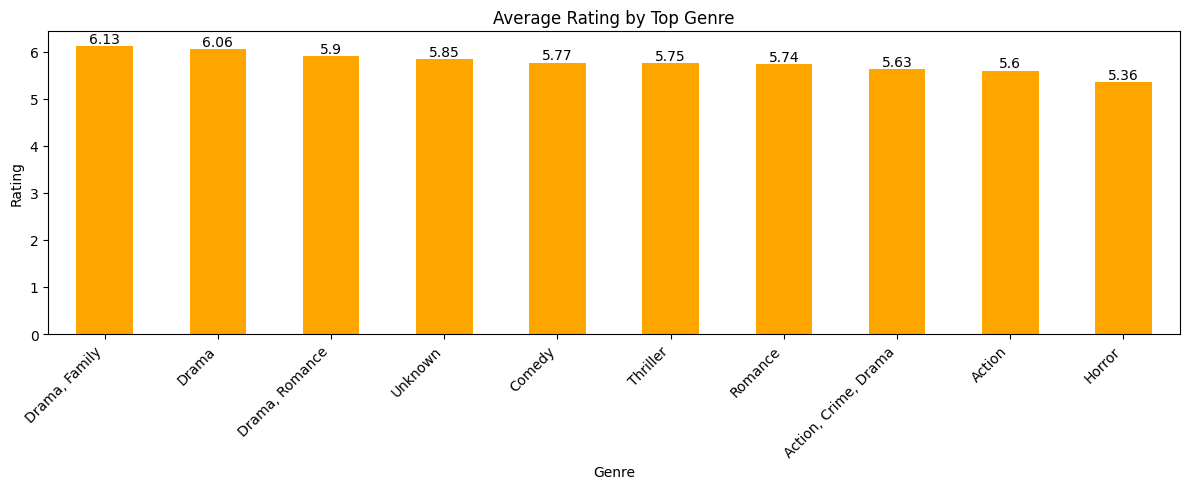

In [18]:
# Count the frequency of each genre
genre_counts = data['Genre'].value_counts()

# Select the top 10 genres
top_10_genres = genre_counts.nlargest(10).index

# Filter the dataset to include only the top 10 genres
top_10_data = data[data['Genre'].isin(top_10_genres)]

# Calculate the mean rating for each genre
genre_ratings = top_10_data.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 5))
genre_ratings.plot(kind='bar', color='orange')
plt.title('Average Rating by Top Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for i, v in enumerate(genre_ratings):
    plt.text(i, v + 0.001, str(round(v, 2)), ha='center', va='bottom')
plt.show()

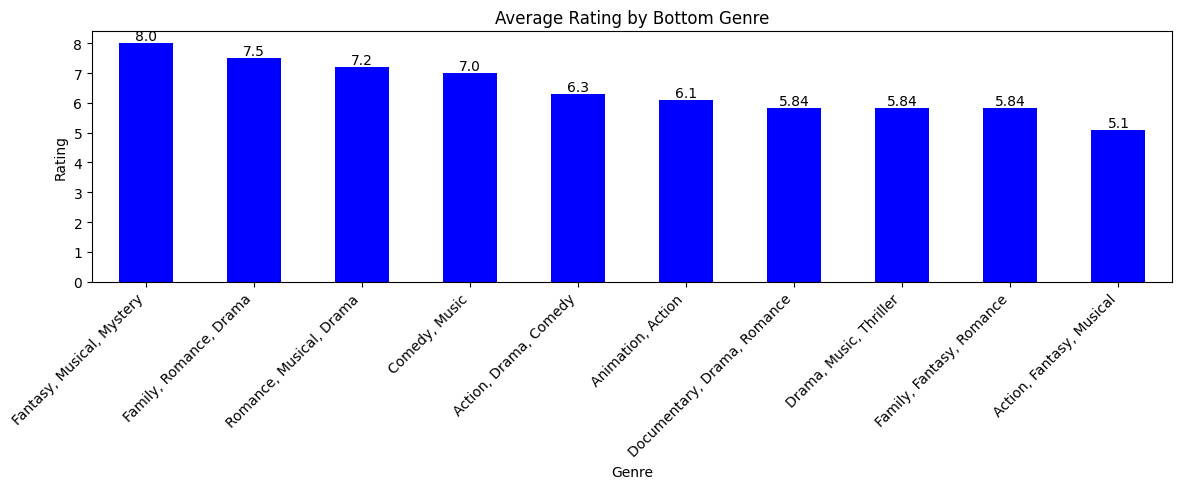

In [31]:
# Count the frequency of each genre
genre_counts = data['Genre'].value_counts()

# Select the top 10 genres
top_10_genres = genre_counts.nsmallest(10).index

# Filter the dataset to include only the top 10 genres
top_10_data = data[data['Genre'].isin(top_10_genres)]

# Calculate the mean rating for each genre
genre_ratings = top_10_data.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 5))
genre_ratings.plot(kind='bar', color='blue')
plt.title('Average Rating by Bottom Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for i, v in enumerate(genre_ratings):
    plt.text(i, v + 0.00001, str(round(v, 2)), ha='center', va='bottom')
plt.show()

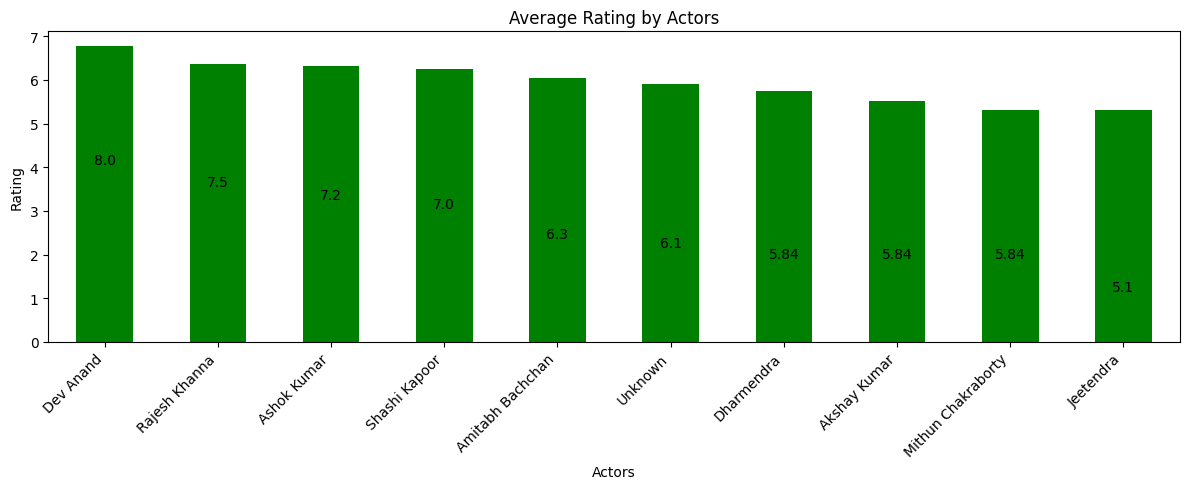

In [24]:
# Count the frequency of each genre
actor_counts = data['Actor 1'].value_counts()

# Select the top 10 genres
top_10_actor = actor_counts.nlargest(10).index

# Filter the dataset to include only the top 10 genres
top_10_data = data[data['Actor 1'].isin(top_10_actor)]

# Calculate the mean rating for each genre
actor_ratings = top_10_data.groupby('Actor 1')['Rating'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 5))
actor_ratings.plot(kind='bar', color='green')
plt.title('Average Rating by Actors')
plt.xlabel('Actors')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for i, v in enumerate(genre_ratings):
    plt.text(i, v + -4, str(round(v, 2)), ha='center', va='bottom')
plt.show()

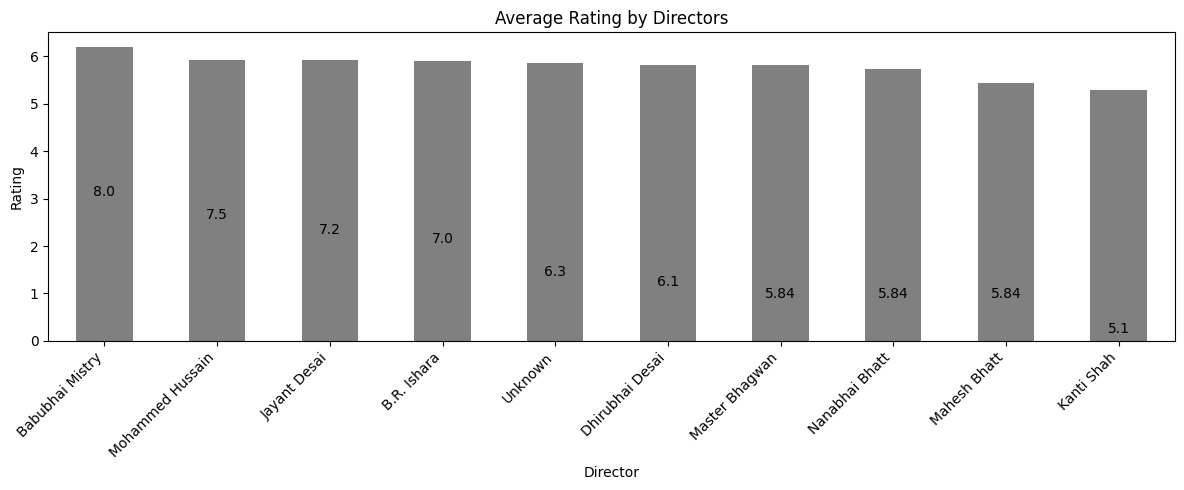

In [21]:
# Count the frequency of each genre
director_counts = data['Director'].value_counts()

# Select the top 10 genres
top_10_director = director_counts.nlargest(10).index

# Filter the dataset to include only the top 10 genres
top_10_datas = data[data['Director'].isin(top_10_director)]

# Calculate the mean rating for each genre
director_ratings = top_10_datas.groupby('Director')['Rating'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 5))
director_ratings.plot(kind='bar', color='grey')
plt.title('Average Rating by Directors')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for i, v in enumerate(genre_ratings):
    plt.text(i, v - 5, str(round(v, 2)), ha='center', va='bottom')
plt.show()

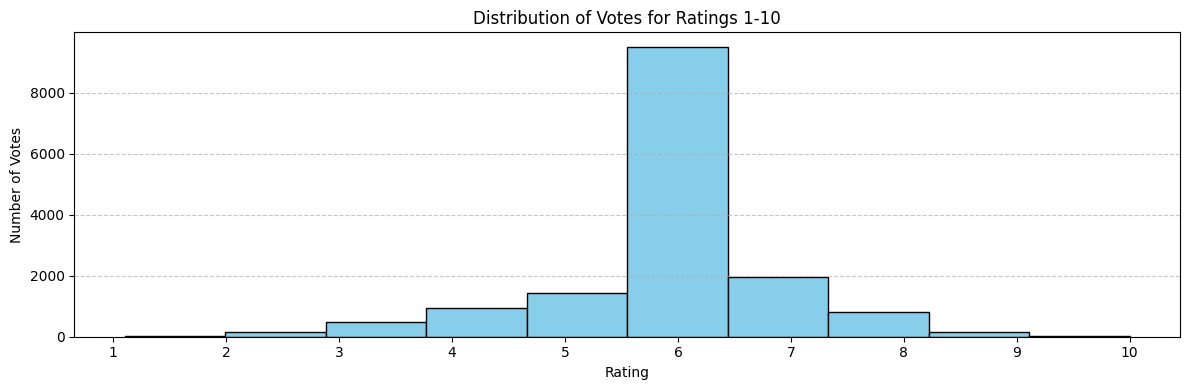

In [22]:
# Filter the dataset to include only ratings from 1 to 10
filtered_data = data[(data['Rating'] >= 1) & (data['Rating'] <= 10)]

# Plotting
plt.figure(figsize=(12, 4))
plt.hist(filtered_data['Rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Votes for Ratings 1-10')
plt.xlabel('Rating')
plt.ylabel('Number of Votes')
plt.xticks(range(1, 11))  # Set x-axis ticks from 1 to 10
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Preprocessing

datas = pd.read_csv('C:\\Users\\User\\Downloads\\IMDb Movies India.csv',encoding="unicode_escape")
datas['Rating'].fillna(datas['Rating'].mean(), inplace=True)
columns_to_replace = ['Genre','Year','Duration','Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
datas[columns_to_replace] = datas[columns_to_replace].fillna('Unknown')


# Encode categorical variables using label encoding
label_encoder = LabelEncoder()
datas['Genre'] = label_encoder.fit_transform(datas['Genre'])
datas['Director'] = label_encoder.fit_transform(datas['Director'])
datas['Actor 1'] = label_encoder.fit_transform(datas['Actor 1'])
datas['Actor 2'] = label_encoder.fit_transform(datas['Actor 2'])
datas['Actor 3'] = label_encoder.fit_transform(datas['Actor 3'])


# Step 2: Model Training
# Separate features (X) and target variable (y)
X = datas[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = datas['Rating']

# Train a regression model on the entire dataset
model = RandomForestRegressor()
model.fit(X, y)

# Step 3: Model Prediction
# Use your trained model to make predictions on the entire dataset
predictions = model.predict(X)


# Compare the predicted ratings with the original ratings
mse = mean_squared_error(y, predictions)
rmse = mse ** 0.5
print("Root Mean Squared Error on Training Data:", rmse)
#Root Mean Squared Error (RMSE) is a commonly used metric to evaluate the performance of a regression model. 
#It measures the average deviation of the predicted values from the actual values in the dataset, with a lower RMSE indicating better performance

Root Mean Squared Error on Training Data: 0.3637602879137349


In [29]:
datas['Predicted_Rating'] = predictions

# Display the dataset with the new column
datas.sample(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Predicted_Rating
5512,Harami,(2020),100 min,246,7.700000,957,5036,1246,3469,1022,6.818659
8017,Ladli,(1949),Unknown,323,5.841621,Unknown,1942,1051,319,4481,5.838627
10589,Pardesi Pankhi,(1937),Unknown,484,5.841621,Unknown,1445,2735,1115,1255,5.867124
1631,Badle Ki Jwala,(1986),Unknown,0,5.841621,Unknown,2694,891,2080,4037,5.777459
12916,Sharda,(1981),126 min,313,5.500000,19,2590,1682,3302,3691,5.508497
572,Abhiyog,(1996),Unknown,299,5.841621,Unknown,5549,4388,4558,4481,5.848021
13167,Shrimati Ji,(1952),Unknown,234,4.100000,7,1844,2588,4088,1428,4.638081
10981,Pratikar,(1991),150 min,29,4.900000,105,4063,3189,327,2065,5.223416
183,Aaag Hi Aag,(1999),Unknown,0,4.900000,28,5413,2402,1518,4068,5.033578
5179,Gopi,(1970),143 min,20,7.000000,195,1,1176,3615,2847,6.320162


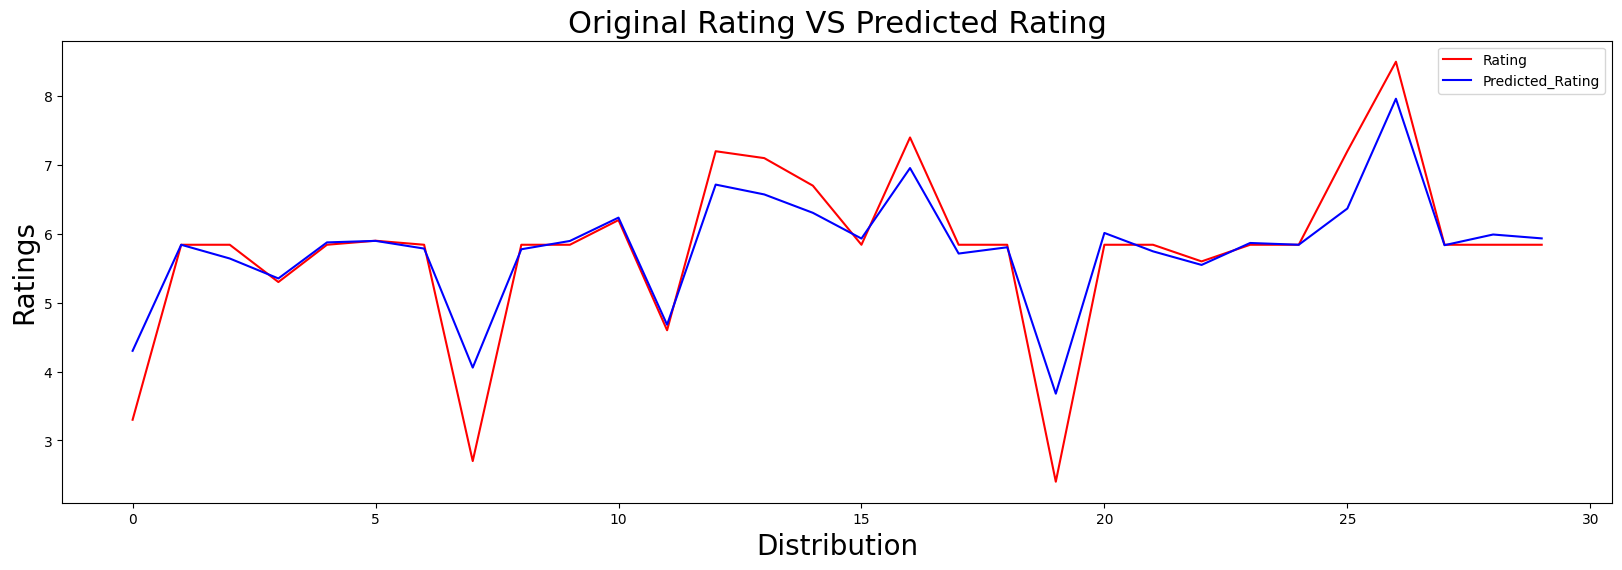

In [65]:
dat = datas.sample(30)
plt.figure(figsize=(20,6))
plt.plot(range(len(dat)), dat['Rating'], color='red', label='Rating')
plt.plot(range(len(dat)), dat['Predicted_Rating'], color='blue', label='Predicted_Rating')  # Stacking bars
plt.xlabel('Distribution',fontsize=20)
plt.ylabel('Ratings',fontsize=20)
plt.title('Original Rating VS Predicted Rating',fontsize=22)
plt.legend()
plt.show()

In [120]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Preprocessing

datass = pd.read_csv('C:\\Users\\User\\Downloads\\IMDb Movies India.csv',encoding="unicode_escape")
datass['Rating'].fillna(datass['Rating'].mean(), inplace=True)
columns_to_replace = ['Genre','Year','Duration','Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
datass[columns_to_replace] = datass[columns_to_replace].fillna('Unknown')


# Encode categorical variables using label encoding
label_encoder = LabelEncoder()
datass['Genre'] = label_encoder.fit_transform(datass['Genre'])
datass['Director'] = label_encoder.fit_transform(datass['Director'])
datass['Actor 1'] = label_encoder.fit_transform(datass['Actor 1'])
datass['Actor 2'] = label_encoder.fit_transform(datass['Actor 2'])
datass['Actor 3'] = label_encoder.fit_transform(datass['Actor 3'])


# Step 2: Model Training
# Separate features (X) and target variable (y)
X = datass[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = datass['Rating']

# Train a regression model on the entire dataset
model = LinearRegression()
model.fit(X, y)

# Step 3: Model Prediction
# Use your trained model to make predictions on the entire dataset
predictions = model.predict(X)


# Compare the predicted ratings with the original ratings
mse = mean_squared_error(y, predictions)
rmse = mse ** 0.5
print("Root Mean Squared Error on Training Data:", rmse)
#Root Mean Squared Error (RMSE) is a commonly used metric to evaluate the performance of a regression model. 
#It measures the average deviation of the predicted values from the actual values in the dataset, with a lower RMSE indicating better performance

Root Mean Squared Error on Training Data: 0.9833405905557632


In [121]:
datass['Predict_Rating'] = predictions

# Display the dataset with the new column
datass.sample(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Predict_Rating
9307,Midnight Mail,(1939),Unknown,0,5.841621,Unknown,2147,4669,2610,1299,5.721344
11981,Room: The Mystery,(2015),90 min,479,3.500000,31,1470,665,1441,3445,5.913432
5864,Hum Hum Hain,(2021),113 min,299,5.841621,Unknown,985,2545,2852,3610,5.876590
14301,The Zero Line,(2017),Unknown,479,6.500000,11,2319,3947,3668,1556,5.948551
12154,Sach,(1989),Unknown,299,5.900000,10,5775,502,4756,1367,5.833145
8405,Ma Amba Gabbarwali,(1976),132 min,299,5.841621,Unknown,857,3001,1345,2260,5.840025
10723,Pedro,(1960),Unknown,0,5.841621,Unknown,43,991,651,3902,5.703117
4714,Fired,(2010),87 min,409,4.400000,261,4510,3046,1090,2519,5.868884
11595,Rajnandini,(2019),Unknown,409,5.841621,Unknown,5436,4084,974,800,5.848873
7556,Khela,(2008),97 min,191,7.200000,222,4268,1431,2189,3711,5.791105


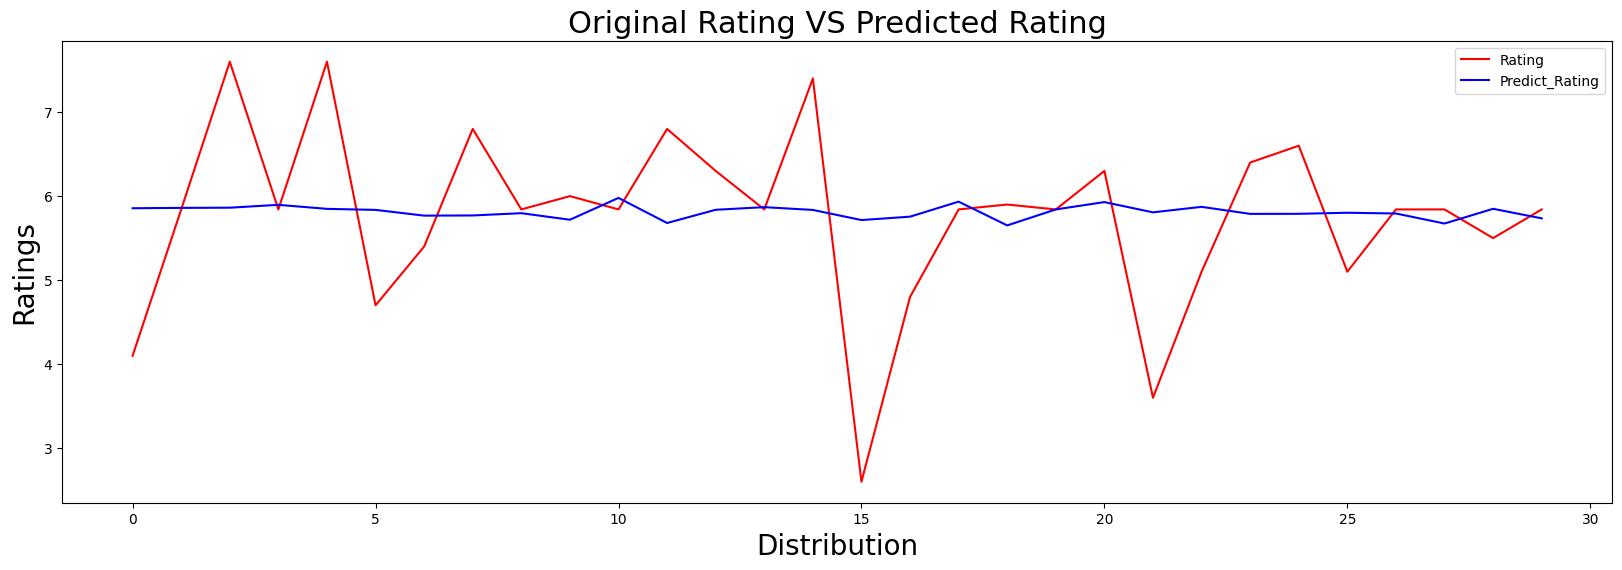

In [123]:
da = datass.sample(30)
plt.figure(figsize=(20,6))
plt.plot(range(len(da)), da['Rating'], color='red', label='Rating')
plt.plot(range(len(da)), da['Predict_Rating'], color='blue', label='Predict_Rating')  # Stacking bars
plt.xlabel('Distribution',fontsize=20)
plt.ylabel('Ratings',fontsize=20)
plt.title('Original Rating VS Predicted Rating',fontsize=22)
plt.legend()
plt.show()